<a href="https://colab.research.google.com/github/sheha919/Cobaltocenium_project/blob/main/ml_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
set_config(display='diagram')
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# Keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

import shap
from lime.lime_tabular import LimeTabularExplainer

## Customization Options
plt.style.use(('ggplot','tableau-colorblind10'))
sns.set_context(context='notebook', font_scale= 1.2)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['figure.facecolor']='white'

C:\Users\sheha\anaconda3\envs\dojo-env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df=pd.read_excel('cobaltocenium_data.xlsx')
df.head()

,Unnamed: 0,Name,Co[CpY][CpY']OH energy (Eh),CoCpY' name,CoCpY'energy (Eh),CpY name,CpY energy (Eh),BDE (kcal/mol),Dipole moment(Debye),EHOMO(Co[CpY][CpY']OH) (Eh),...,ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability,Hardness (kcal/mol),dCOM (Å),rCo-O (Å)
0,0,Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH,-2113.503825,N(CH₃)₂,-1785.987408,N(CH₃)₂,-327.488954,17.233174,15.5954,-0.1803,...,-0.0719,-0.1594,-0.0809,0.011840,0.01184,27.53932,27.53932,-39.156000,3.337480,3.856084
1,1,Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH,-2094.048389,OCH₃,-1766.531474,N(CH₃)₂,-327.488954,17.545539,14.9760,-0.1867,...,-0.0727,-0.1594,-0.0809,-0.015190,0.01184,18.01558,27.53932,-39.532500,3.314513,4.150980
2,2,Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH,-2207.402596,O(CO)CH₃,-1879.885018,N(CH₃)₂,-327.488954,17.961810,18.7135,-0.1849,...,-0.0855,-0.1594,-0.0809,0.071736,0.01184,27.13368,27.53932,-37.085250,3.312872,4.065847
3,3,Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH,-2400.122408,P(CH₃)₂,-2072.607246,N(CH₃)₂,-327.488954,16.445457,19.9044,-0.1862,...,-0.0814,-0.1594,-0.0809,-0.059590,0.01184,43.11939,27.53932,-37.744125,3.333984,4.033683
4,4,Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH,-2417.026291,S(CH₃),-2089.514536,N(CH₃)₂,-327.488954,14.308038,14.9101,-0.1868,...,-0.0817,-0.1594,-0.0809,0.019722,0.01184,27.96205,27.53932,-38.089250,3.328151,3.818543


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   903 non-null    int64  
 1   Name                         903 non-null    object 
 2   Co[CpY][CpY']OH energy (Eh)  903 non-null    float64
 3   CoCpY' name                  903 non-null    object 
 4   CoCpY'energy (Eh)            903 non-null    float64
 5   CpY name                     903 non-null    object 
 6   CpY energy (Eh)              903 non-null    float64
 7   BDE (kcal/mol)               903 non-null    float64
 8   Dipole moment(Debye)         903 non-null    float64
 9   EHOMO(Co[CpY][CpY']OH) (Eh)  903 non-null    float64
 10  ELUMO(Co[CpY][CpY']OH) (Eh)  903 non-null    float64
 11  EHOMO(CoCpY'OH) (Eh)         903 non-null    float64
 12  ELUMO(CoCpY'OH) (Eh)         903 non-null    float64
 13  EHOMO(CpY) (Eh)     

In [4]:
ml_df=df.copy()

In [5]:
ml_df=ml_df.drop(columns=['Unnamed: 0'], axis = 1)
ml_df.head()

,Name,Co[CpY][CpY']OH energy (Eh),CoCpY' name,CoCpY'energy (Eh),CpY name,CpY energy (Eh),BDE (kcal/mol),Dipole moment(Debye),EHOMO(Co[CpY][CpY']OH) (Eh),ELUMO(Co[CpY][CpY']OH) (Eh),...,ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability,Hardness (kcal/mol),dCOM (Å),rCo-O (Å)
0,Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH,-2113.503825,N(CH₃)₂,-1785.987408,N(CH₃)₂,-327.488954,17.233174,15.5954,-0.1803,-0.0555,...,-0.0719,-0.1594,-0.0809,0.011840,0.01184,27.53932,27.53932,-39.156000,3.337480,3.856084
1,Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH,-2094.048389,OCH₃,-1766.531474,N(CH₃)₂,-327.488954,17.545539,14.9760,-0.1867,-0.0607,...,-0.0727,-0.1594,-0.0809,-0.015190,0.01184,18.01558,27.53932,-39.532500,3.314513,4.150980
2,Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH,-2207.402596,O(CO)CH₃,-1879.885018,N(CH₃)₂,-327.488954,17.961810,18.7135,-0.1849,-0.0667,...,-0.0855,-0.1594,-0.0809,0.071736,0.01184,27.13368,27.53932,-37.085250,3.312872,4.065847
3,Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH,-2400.122408,P(CH₃)₂,-2072.607246,N(CH₃)₂,-327.488954,16.445457,19.9044,-0.1862,-0.0659,...,-0.0814,-0.1594,-0.0809,-0.059590,0.01184,43.11939,27.53932,-37.744125,3.333984,4.033683
4,Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH,-2417.026291,S(CH₃),-2089.514536,N(CH₃)₂,-327.488954,14.308038,14.9101,-0.1868,-0.0654,...,-0.0817,-0.1594,-0.0809,0.019722,0.01184,27.96205,27.53932,-38.089250,3.328151,3.818543


#Filter Data

In [6]:
#BDE data greater than 3kcal/mol
drop_bde = (ml_df[ml_df['BDE (kcal/mol)']<=3])
len(drop_bde)

30

In [7]:
drop_bde['Name']

290            Co(Cp-C₂H)(Cp-CBr₃)OH
450             Co(Cp-Cl)(Cp-CBr₃)OH
479             Co(Cp-Br)(Cp-CBr₃)OH
507              Co(Cp-F)(Cp-CBr₃)OH
534      Co(Cp-(CO)NHCH₃)(Cp-CBr₃)OH
585       Co(Cp-(CO)OCH₃)(Cp-CBr₃)OH
632          Co(Cp-(CO)H)(Cp-CBr₃)OH
651        Co(Cp-(CO)F)(Cp-(CO)Cl)OH
654          Co(Cp-(CO)F)(Cp-CBr₃)OH
657           Co(Cp-(CO)F)(Cp-NO₂)OH
658        Co(Cp-(CO)F)(Cp-SOOCF₃)OH
672       Co(Cp-(CO)Cl)(Cp-(CO)Cl)OH
675         Co(Cp-(CO)Cl)(Cp-CBr₃)OH
676           Co(Cp-(CO)Cl)(Cp-CN)OH
678          Co(Cp-(CO)Cl)(Cp-NO₂)OH
679       Co(Cp-(CO)Cl)(Cp-SOOCF₃)OH
695            Co(Cp-CF₃)(Cp-CBr₃)OH
714           Co(Cp-CCl₃)(Cp-CBr₃)OH
732           Co(Cp-CBr₃)(Cp-CBr₃)OH
733             Co(Cp-CBr₃)(Cp-CN)OH
734         Co(Cp-CBr₃)(Cp-SOOCH₃)OH
735            Co(Cp-CBr₃)(Cp-NO₂)OH
736         Co(Cp-CBr₃)(Cp-SOOCF₃)OH
740        Co(Cp-CBr₃)(Cp-o-PhCF₃)OH
745    Co(Cp-CBr₃)(Cp-op-Ph(CH₃)₃)OH
752              Co(Cp-CN)(Cp-NO₂)OH
753           Co(Cp-CN)(Cp-SOOCF₃)OH
7

In [8]:
ml_df = ml_df[ml_df['BDE (kcal/mol)']>3]
len(ml_df)

873

In [9]:
frag = ml_df[["Name", "CoCpY' name", "CpY name", 
              "BDE (kcal/mol)",
              "EHOMO(CoCpY'OH) (Eh)", "ELUMO(CoCpY'OH) (Eh)", 
              "EHOMO(CpY) (Eh)", "ELUMO(CpY) (Eh)", 
              "CoCpY' Hirshfeld charge", "CpY Hirshfeld charge",
              "CoCpY' polarizability", "CpY polarizability"]]
frag.head()

,Name,CoCpY' name,CpY name,BDE (kcal/mol),EHOMO(CoCpY'OH) (Eh),ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability
0,Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH,N(CH₃)₂,N(CH₃)₂,17.233174,-0.1787,-0.0719,-0.1594,-0.0809,0.011840,0.01184,27.53932,27.53932
1,Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH,OCH₃,N(CH₃)₂,17.545539,-0.1935,-0.0727,-0.1594,-0.0809,-0.015190,0.01184,18.01558,27.53932
2,Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH,O(CO)CH₃,N(CH₃)₂,17.961810,-0.2170,-0.0855,-0.1594,-0.0809,0.071736,0.01184,27.13368,27.53932
3,Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH,P(CH₃)₂,N(CH₃)₂,16.445457,-0.2133,-0.0814,-0.1594,-0.0809,-0.059590,0.01184,43.11939,27.53932
4,Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH,S(CH₃),N(CH₃)₂,14.308038,-0.2015,-0.0817,-0.1594,-0.0809,0.019722,0.01184,27.96205,27.53932


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


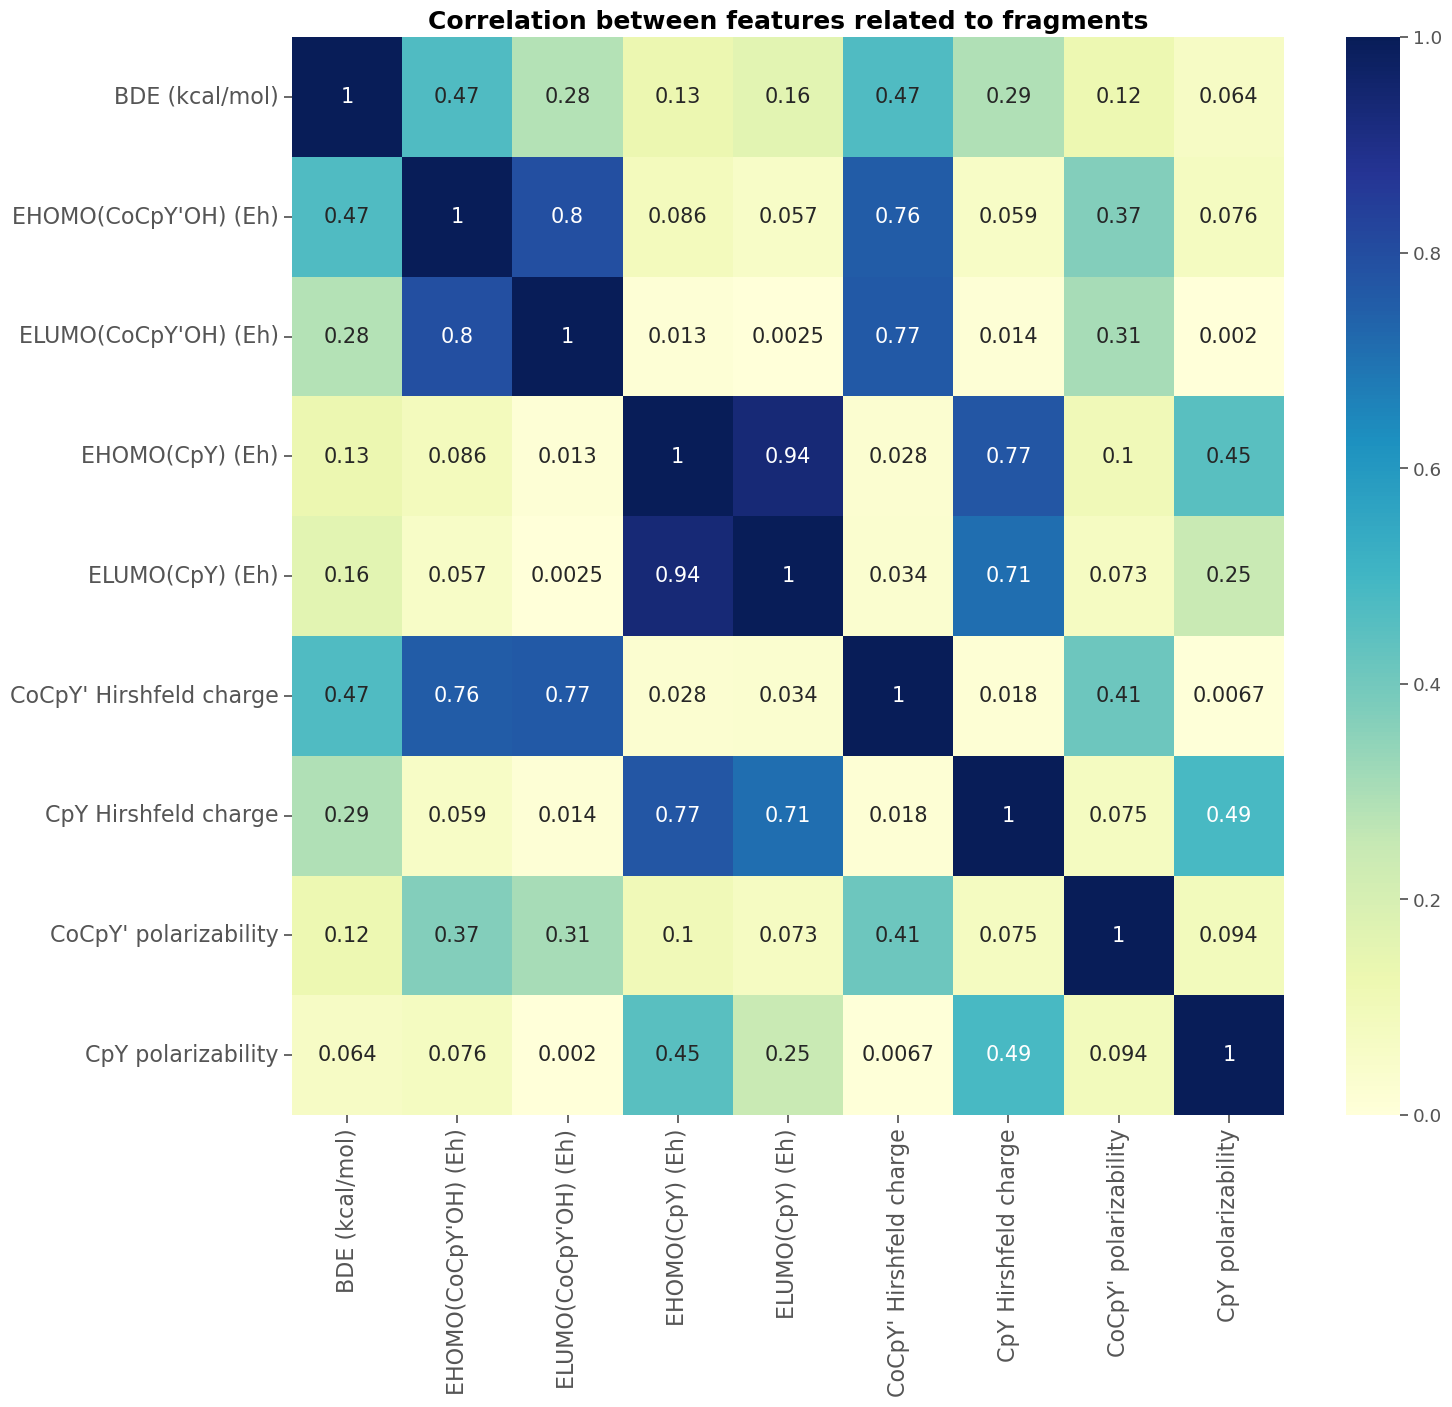

In [10]:
corr = abs(frag.corr())
plt.figure(figsize=[16,14])
sns.heatmap(corr, cmap="YlGnBu",  vmin=0.0, vmax=1.0,annot = True, annot_kws={'size': 15})
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Correlation between features related to fragments', fontsize = 18, fontweight = 'bold');

# Statistics

In [11]:
ml_df.describe()

,Co[CpY][CpY']OH energy (Eh),CoCpY'energy (Eh),CpY energy (Eh),BDE (kcal/mol),Dipole moment(Debye),EHOMO(Co[CpY][CpY']OH) (Eh),ELUMO(Co[CpY][CpY']OH) (Eh),EHOMO(CoCpY'OH) (Eh),ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability,Hardness (kcal/mol),dCOM (Å),rCo-O (Å)
count,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000
mean,-2885.015296,-2078.544199,-806.446835,15.224432,16.170617,-0.191159,-0.086005,-0.214888,-0.085469,-0.200897,-0.117825,0.034738,0.020129,32.582851,48.667438,-32.992052,3.300790,4.008424
std,1343.930437,778.250606,1106.634781,6.629545,3.231558,0.006312,0.011437,0.013198,0.008885,0.021833,0.016527,0.062240,0.050861,29.889890,33.700939,3.965526,0.010104,0.159475
min,-10408.735637,-9411.126546,-7952.631083,3.185810,4.493000,-0.223500,-0.118800,-0.237800,-0.106800,-0.246900,-0.151300,-0.081960,-0.081960,0.265420,0.265420,-46.529125,3.282637,3.691918
25%,-2880.695616,-2220.117477,-768.161154,10.742214,14.038600,-0.191500,-0.093000,-0.224500,-0.092000,-0.216600,-0.125000,-0.024960,-0.015190,12.952910,22.669890,-35.328250,3.292941,3.896393
50%,-2567.428016,-1879.885018,-542.529457,14.245329,16.331700,-0.190000,-0.084900,-0.213300,-0.085100,-0.201000,-0.118300,0.038080,0.011965,24.041310,52.745580,-33.100625,3.298622,3.994029
75%,-2283.371861,-1766.531474,-397.996994,18.345363,18.211100,-0.188400,-0.078200,-0.204500,-0.079400,-0.188600,-0.112600,0.081263,0.057107,43.981350,60.200450,-30.465125,3.305980,4.104762
max,-1845.520993,-1652.003971,-193.474683,42.413274,27.728700,-0.180300,-0.054800,-0.171600,-0.063300,-0.155200,-0.076800,0.160449,0.160449,150.643000,150.643000,-22.935125,3.337480,4.725310


In [12]:
#checking for duplicates
ml_df.duplicated().sum()

0

In [13]:
#checking for missing values
ml_df.isna().sum().sum()

0

In [14]:
ml_df.head()

,Name,Co[CpY][CpY']OH energy (Eh),CoCpY' name,CoCpY'energy (Eh),CpY name,CpY energy (Eh),BDE (kcal/mol),Dipole moment(Debye),EHOMO(Co[CpY][CpY']OH) (Eh),ELUMO(Co[CpY][CpY']OH) (Eh),...,ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability,Hardness (kcal/mol),dCOM (Å),rCo-O (Å)
0,Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH,-2113.503825,N(CH₃)₂,-1785.987408,N(CH₃)₂,-327.488954,17.233174,15.5954,-0.1803,-0.0555,...,-0.0719,-0.1594,-0.0809,0.011840,0.01184,27.53932,27.53932,-39.156000,3.337480,3.856084
1,Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH,-2094.048389,OCH₃,-1766.531474,N(CH₃)₂,-327.488954,17.545539,14.9760,-0.1867,-0.0607,...,-0.0727,-0.1594,-0.0809,-0.015190,0.01184,18.01558,27.53932,-39.532500,3.314513,4.150980
2,Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH,-2207.402596,O(CO)CH₃,-1879.885018,N(CH₃)₂,-327.488954,17.961810,18.7135,-0.1849,-0.0667,...,-0.0855,-0.1594,-0.0809,0.071736,0.01184,27.13368,27.53932,-37.085250,3.312872,4.065847
3,Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH,-2400.122408,P(CH₃)₂,-2072.607246,N(CH₃)₂,-327.488954,16.445457,19.9044,-0.1862,-0.0659,...,-0.0814,-0.1594,-0.0809,-0.059590,0.01184,43.11939,27.53932,-37.744125,3.333984,4.033683
4,Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH,-2417.026291,S(CH₃),-2089.514536,N(CH₃)₂,-327.488954,14.308038,14.9101,-0.1868,-0.0654,...,-0.0817,-0.1594,-0.0809,0.019722,0.01184,27.96205,27.53932,-38.089250,3.328151,3.818543


In [15]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 0 to 902
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         873 non-null    object 
 1   Co[CpY][CpY']OH energy (Eh)  873 non-null    float64
 2   CoCpY' name                  873 non-null    object 
 3   CoCpY'energy (Eh)            873 non-null    float64
 4   CpY name                     873 non-null    object 
 5   CpY energy (Eh)              873 non-null    float64
 6   BDE (kcal/mol)               873 non-null    float64
 7   Dipole moment(Debye)         873 non-null    float64
 8   EHOMO(Co[CpY][CpY']OH) (Eh)  873 non-null    float64
 9   ELUMO(Co[CpY][CpY']OH) (Eh)  873 non-null    float64
 10  EHOMO(CoCpY'OH) (Eh)         873 non-null    float64
 11  ELUMO(CoCpY'OH) (Eh)         873 non-null    float64
 12  EHOMO(CpY) (Eh)              873 non-null    float64
 13  ELUMO(CpY) (Eh)     

#Validate Split

In [16]:
y = ml_df['BDE (kcal/mol)']
X = ml_df[["EHOMO(CoCpY'OH) (Eh)", "ELUMO(CoCpY'OH) (Eh)", "EHOMO(CpY) (Eh)", "ELUMO(CpY) (Eh)", "CoCpY' Hirshfeld charge", "CpY Hirshfeld charge"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [17]:
X_train

,EHOMO(CoCpY'OH) (Eh),ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge
549,-0.2192,-0.0863,-0.1552,-0.0768,0.031767,-0.081960
399,-0.2009,-0.0945,-0.2027,-0.1250,-0.033870,0.024095
794,-0.2350,-0.1068,-0.1815,-0.1118,0.160449,-0.041080
313,-0.2053,-0.0778,-0.2190,-0.1256,-0.024960,0.083209
327,-0.2053,-0.0778,-0.2435,-0.1513,-0.024960,0.160449
...,...,...,...,...,...,...
106,-0.2297,-0.0944,-0.2092,-0.1170,0.156189,0.071736
270,-0.2003,-0.0802,-0.1552,-0.0768,0.008470,-0.081960
890,-0.2060,-0.0794,-0.1552,-0.0768,-0.042140,-0.081960
436,-0.2131,-0.0789,-0.1952,-0.1163,-0.050620,-0.040350


# Functions

## Evaluvation

In [18]:
#function for evaluation
def eval_model(pipe, X_train=X_train, y_train=y_train, X_test=X_test , y_test= y_test):
  eval_results = pd.DataFrame(columns = ['Metrics','Train Score', 'Test Score'])
  train_mae = mean_absolute_error(y_train, pipe.predict(X_train))
  test_mae = mean_absolute_error(y_test, pipe.predict(X_test))

  train_mse = mean_squared_error(y_train, pipe.predict(X_train))
  test_mse = mean_squared_error(y_test, pipe.predict(X_test))

  train_rmse = np.sqrt(train_mse)
  test_rmse = np.sqrt(test_mse)

  train_r2 = r2_score(y_train, pipe.predict(X_train))
  test_r2 = r2_score(y_test, pipe.predict(X_test))

  eval_results.loc[1, 'Metrics'] = 'MAE'
  eval_results.loc[2, 'Metrics'] = 'MSE'
  eval_results.loc[3, 'Metrics'] = 'RMSE'
  eval_results.loc[4, 'Metrics'] = 'R2'

  eval_results.loc[1, 'Train Score'] = train_mae
  eval_results.loc[2, 'Train Score'] = train_mse
  eval_results.loc[3, 'Train Score'] = train_rmse
  eval_results.loc[4, 'Train Score'] = train_r2

  eval_results.loc[1, 'Test Score'] = test_mae
  eval_results.loc[2, 'Test Score'] = test_mse
  eval_results.loc[3, 'Test Score'] = test_rmse
  eval_results.loc[4, 'Test Score'] = test_r2

  return eval_results

In [19]:
#function for final evaluation
def eval_model_final(pipe, 
                     X_train=X_train, y_train=y_train, 
                     X_test=X_test , y_test= y_test):

  train_mse = mean_squared_error(y_train, pipe.predict(X_train))
  test_mse = mean_squared_error(y_test, pipe.predict(X_test))

  train_rmse = np.sqrt(train_mse)
  test_rmse = np.sqrt(test_mse)

  train_r2 = r2_score(y_train, pipe.predict(X_train))
  test_r2 = r2_score(y_test, pipe.predict(X_test))

  return (round(train_r2,6), round(test_r2,6), round(train_rmse,6), round(test_rmse,6))

## Plot

In [20]:
def train_test_plot(model_name, pipe,  X_train=X_train, y_train=y_train, X_test=X_test , y_test= y_test):
  fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(12,4))
#subplot1
  ax = sns.regplot(x = y_train, 
                   y = pipe.predict(X_train), 
                   line_kws = {'color':'black', 'ls': ':', 'label' :f'R$^2$ = {round(r2_score(y_train, pipe.predict(X_train)), 6)}'}, 
                   ax=axes[0],
                   )
  axes[0].set_title('Train Data', fontweight = 'bold')
  axes[0].set_xlabel('Actual BDE (kcal/mol)')
  axes[0].set_ylabel('Predicted BDE (kcal/mol)');

#subplot2
  ax = sns.regplot(x = y_test, 
                   y = pipe.predict(X_test), 
                   line_kws = {'color':'black', 'ls': ':', 
                   'label' : f'R$^2$ = {round(r2_score(y_test, pipe.predict(X_test)), 6)}'}, 
                   ax=axes[1])
  axes[1].set_title('Test Data', fontweight = 'bold')
  axes[1].set_xlabel('Actual BDE (kcal/mol)')
  axes[1].set_ylabel('Predicted BDE (kcal/mol)')
  
  fig.suptitle(f'{model_name}', fontsize = 20, fontweight = 'bold', y = 1.1)
  [ax.legend() for ax in axes];
  return (fig, axes)

# Data Preprocessing

## Instantiate colimn transformers

In [21]:
scaler = StandardScaler()

# Linear Regression Model

In [22]:
lr = LinearRegression()
lr_pipe = make_pipeline(scaler, lr)
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [23]:
#evaluvation of linear rigression
eval_model(lr_pipe)

,Metrics,Train Score,Test Score
1,MAE,2.99316,3.079696
2,MSE,24.018192,25.805519
3,RMSE,4.900836,5.079913
4,R2,0.460002,0.379516


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

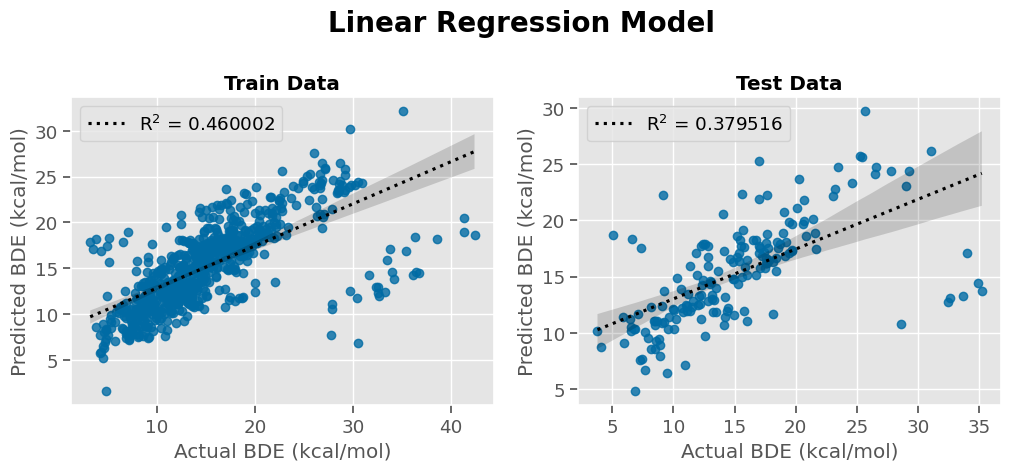

In [24]:
train_test_plot('Linear Regression Model', lr_pipe)

#Decision Tree Model

In [25]:
dt = DecisionTreeRegressor(random_state = 42)
dt_pipe = make_pipeline(scaler, dt)
dt_pipe.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [26]:
#evaluvation of initial decision tree
eval_model(dt_pipe)

,Metrics,Train Score,Test Score
1,MAE,0.0,2.088485
2,MSE,0.0,18.754944
3,RMSE,0.0,4.330698
4,R2,1.0,0.549045


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

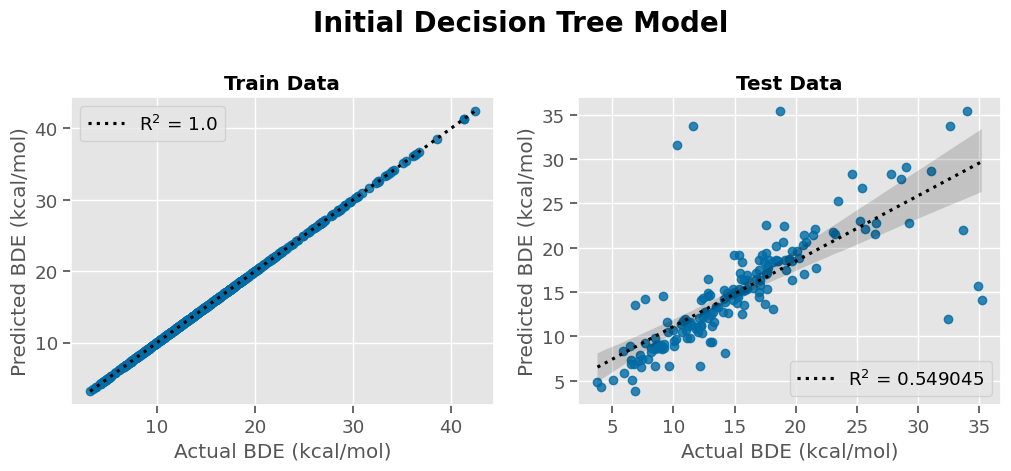

In [27]:
train_test_plot('Initial Decision Tree Model', dt_pipe)

#Bagged Tree Model

In [28]:
bt = BaggingRegressor(random_state = 42)
bt_pipe = make_pipeline(scaler, bt)
bt_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingregressor', BaggingRegressor(random_state=42))])

In [29]:
#evaluvation of initial bagged tree
eval_model(bt_pipe)

,Metrics,Train Score,Test Score
1,MAE,0.654557,1.642923
2,MSE,1.464679,8.350427
3,RMSE,1.210239,2.88971
4,R2,0.96707,0.799217


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

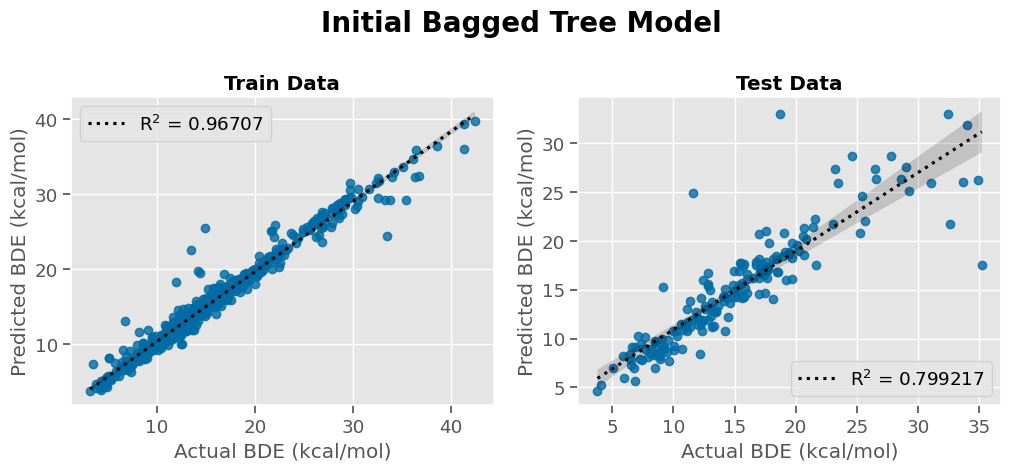

In [30]:
train_test_plot('Initial Bagged Tree Model', bt_pipe)

# K-Nearest Neighbors Model

In [31]:
knn = KNeighborsRegressor()
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train) 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [32]:
#evaluvation of initial knn
eval_model(knn_pipe)

,Metrics,Train Score,Test Score
1,MAE,2.217162,2.946708
2,MSE,13.248198,22.281622
3,RMSE,3.639807,4.720341
4,R2,0.702143,0.464247


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

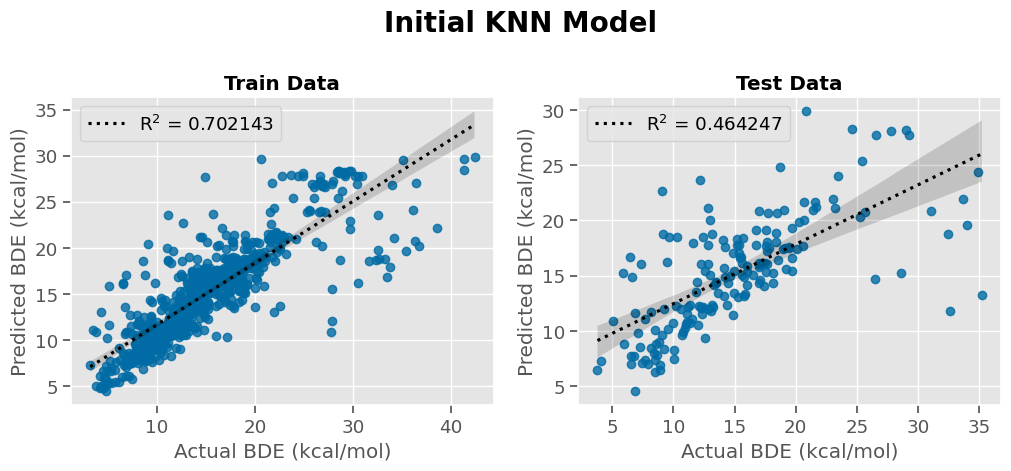

In [33]:
train_test_plot('Initial KNN Model', knn_pipe)

# Random Forest Model

In [34]:
rf = RandomForestRegressor(random_state= 42)
rf_pipe = make_pipeline(scaler, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [35]:
#evaluvation of initial bagged tree
eval_model(rf_pipe)

,Metrics,Train Score,Test Score
1,MAE,0.537543,1.573548
2,MSE,0.781957,7.405083
3,RMSE,0.884284,2.721228
4,R2,0.982419,0.821948


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

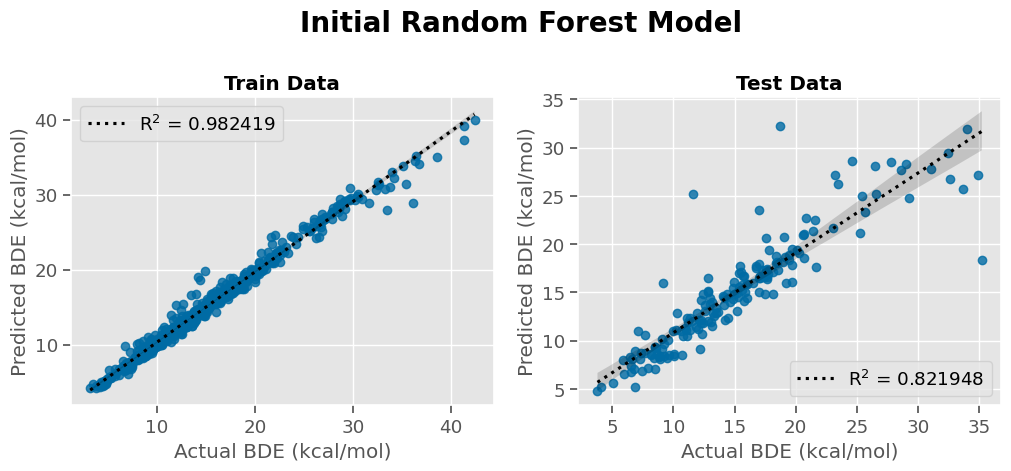

In [36]:
train_test_plot('Initial Random Forest Model', rf_pipe)

#Support Vector Regression Model

In [37]:
svg = SVR()
svg_pipe = make_pipeline(scaler, svg)
svg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [38]:
#evaluvation of initial svg
eval_model(svg_pipe)

,Metrics,Train Score,Test Score
1,MAE,2.718027,2.919293
2,MSE,23.54366,25.85453
3,RMSE,4.852181,5.084735
4,R2,0.470671,0.378338


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

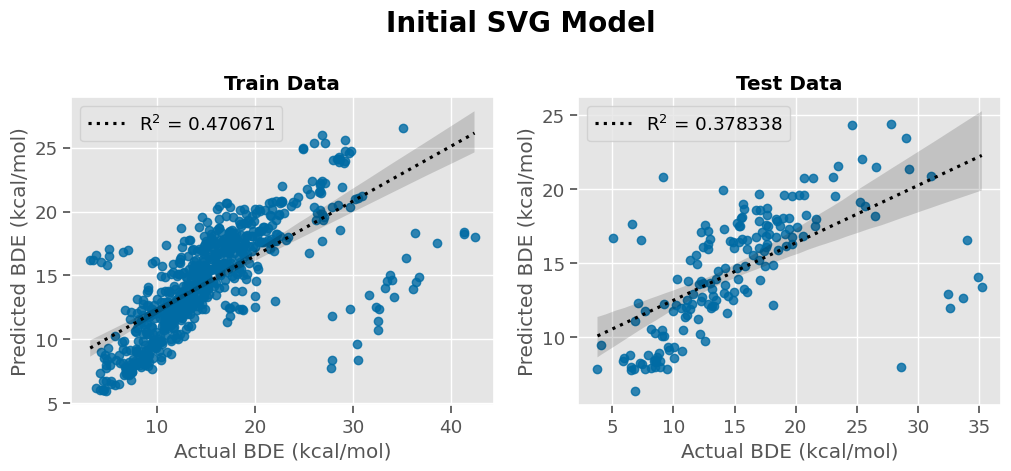

In [39]:
train_test_plot('Initial SVG Model', svg_pipe)

# XG Boost

In [40]:
xgb = XGBRegressor(random_state= 42)
xgb_pipe = make_pipeline(scaler, xgb)
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=12, num_parallel_tree=1, predictor='auto',
                              random_state=42, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [41]:
#evaluvation of initial xgb
eval_model(xgb_pipe)

,Metrics,Train Score,Test Score
1,MAE,0.09895,1.247475
2,MSE,0.020511,6.821619
3,RMSE,0.143216,2.611823
4,R2,0.999539,0.835977


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

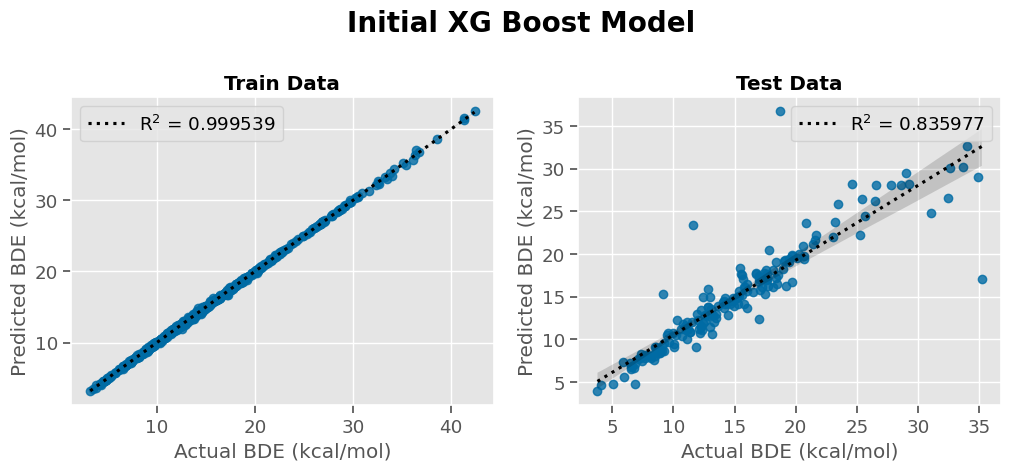

In [42]:
train_test_plot('Initial XG Boost Model', xgb_pipe)

#Evaluvation of initial models

In [43]:
model = ['Linear Regression', 'Decision Tree', 'Bagged Tree', 'KNN', 'Random Forest', 'SVG', 'XG Boost']
pipe = [lr_pipe, dt_pipe, bt_pipe, knn_pipe, rf_pipe, svg_pipe, xgb_pipe]
final_eval_results = pd.DataFrame(columns = ['Model','Train R2', 'Test R2', 'Train RMSE (kcal/mol)', 'Test RMSE (kcal/mol)'])

for i in range(len(model)):
  final_eval_results.loc[i, 'Model'] = model[i]
  final_eval_results.loc[i,'Train R2'], final_eval_results.loc[i,'Test R2'], final_eval_results.loc[i,'Train RMSE (kcal/mol)'], final_eval_results.loc[i,'Test RMSE (kcal/mol)'] = eval_model_final(pipe[i])

In [44]:
final_eval_results.set_index('Model', inplace = True) 
final_eval_results

,Train R2,Test R2,Train RMSE (kcal/mol),Test RMSE (kcal/mol)
Model,,,,
Linear Regression,0.460002,0.379516,4.900836,5.079913
Decision Tree,1.0,0.549045,0.0,4.330698
Bagged Tree,0.96707,0.799217,1.210239,2.88971
KNN,0.702143,0.464247,3.639807,4.720341
Random Forest,0.982419,0.821948,0.884284,2.721228
SVG,0.470671,0.378338,4.852181,5.084735
XG Boost,0.999539,0.835977,0.143216,2.611823


- According to the train and test RMSE values for the models;
  - all models have overfilling issue and decision tree has the highest overfittin problem.
- Out of these 7 models, XG boost, random forest and bagged tree are selected based on the test R$^2$ score to do further optimizations.


#Tunning Hyperparametrs and cross validation of models

## For XG Boost

In [45]:
#parametrs of XG boost model
xgb_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('xgbregressor',
   XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                gamma=0, gpu_id=-1, importance_type=None,
                interaction_constraints='', learning_rate=0.300000012,
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=12,
                num_parallel_tree=1, predictor='auto', random_state=42,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                tree_method='exact', validate_parameters=1, verbosity=None))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'xgbregressor': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1,

In [46]:
xgb_param_grid = {'xgbregressor__max_depth': [2, 3, 4, 5, 6 ],
                  'xgbregressor__learning_rate':[0.27],
                 'xgbregressor__n_estimators': [125]}

In [47]:
xgb_pipe_gs = GridSearchCV(xgb_pipe, xgb_param_grid, cv=5)
xgb_pipe_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=0.5,
                                                     booster='gbtree',
                                                     colsample_bylevel=1,
                                                     colsample_bynode=1,
                                                     colsample_bytree=1,
                                                     enable_categorical=False,
                                                     gamma=0, gpu_id=-1,
                                                     importance_type=None,
                                                     interaction_constraints='',
                                                     learning_rate=0.300000012,
                                                     max_delta_step=0,
                                                     max_depth=6,
                                                     min_c...
                                                     missing=nan,
                                                     monotone_constraints='()',
                                                     n_estimators=100,
                                                     n_jobs=12,
                                                     num_parallel_tree=1,
                                                     predictor='auto',
                                                     random_state=42,
                                                     reg_alpha=0, reg_lambda=1,
                                                     scale_pos_weight=1,
                                                     subsample=1,
                                                     tree_method='exact',
                                                     validate_parameters=1,
                                                     verbosity=None))]),
             param_grid={'xgbregressor__learning_rate': [0.27],
                         'xgbregressor__max_depth': [2, 3, 4, 5, 6],
                         'xgbregressor__n_estimators': [125]})

In [48]:
print(f'Best parameters: {xgb_pipe_gs.best_params_}')

Best parameters: {'xgbregressor__learning_rate': 0.27, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 125}


In [49]:
xgb_opt = xgb_pipe_gs.best_estimator_
xgb_opt.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='', learning_rate=0.27,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=125, n_jobs=12, num_parallel_tree=1,
                              predictor='auto', random_state=42, reg_alpha=0,
                              reg_lambda=1, scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [50]:
eval_model(xgb_opt)

,Metrics,Train Score,Test Score
1,MAE,0.681964,1.088518
2,MSE,1.497495,4.951476
3,RMSE,1.223722,2.225191
4,R2,0.966332,0.880944


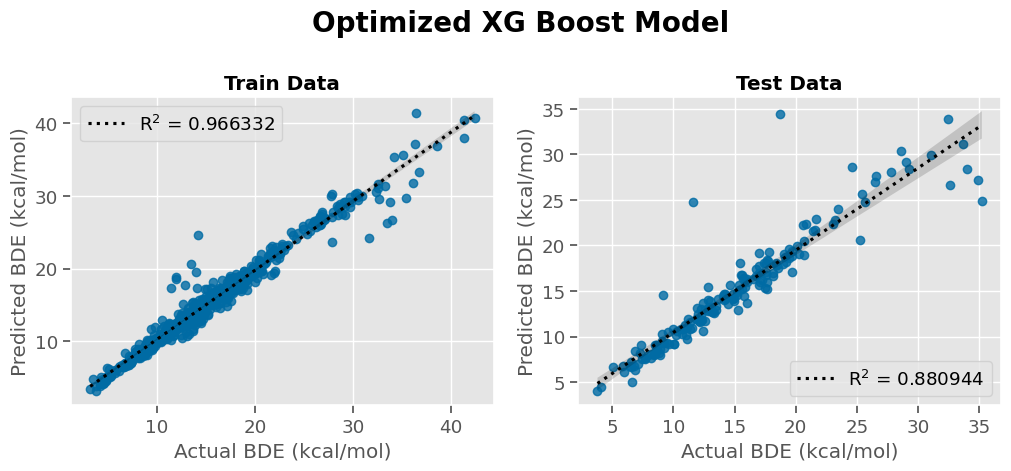

In [51]:
train_test_plot('Optimized XG Boost Model', xgb_opt)
plt.savefig('xgb_opt.png')

In [52]:
feature_names = scaler.get_feature_names_out()
feature_names

array(["EHOMO(CoCpY'OH) (Eh)", "ELUMO(CoCpY'OH) (Eh)", 'EHOMO(CpY) (Eh)',
       'ELUMO(CpY) (Eh)', "CoCpY' Hirshfeld charge",
       'CpY Hirshfeld charge'], dtype=object)

In [53]:
scaler.fit(X_train, y_train)

StandardScaler()

In [54]:
#reading X_train into a dataframes
X_train_df = pd.DataFrame(scaler.transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)
X_train_df.head()

,EHOMO(CoCpY'OH) (Eh),ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge
549,-0.320343,-0.094734,2.095911,2.500335,-0.041762,-2.026410
399,1.075055,-1.016877,-0.072640,-0.427339,-1.092496,0.073192
794,-1.525112,-2.400092,0.895218,0.374431,2.018213,-1.217097
313,0.739550,0.861146,-0.816796,-0.463783,-0.949862,1.243489
327,0.739550,0.861146,-1.935312,-2.024804,-0.949862,2.772632


In [55]:
#reading X_test into a dataframes
X_test_df = pd.DataFrame(scaler.transform(X_test), 
                          columns = feature_names,
                         index = X_test.index)
X_test_df.head()

,EHOMO(CoCpY'OH) (Eh),ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge
825,0.548921,0.647479,-0.113729,-0.348377,-0.734871,-0.632087
320,0.739550,0.861146,-1.656824,-1.569253,-0.949862,1.610491
383,1.075055,-1.016877,-1.136372,-1.071184,-1.092496,0.524669
764,-1.120980,-1.005631,2.095911,2.500335,1.950018,-2.026410
423,0.144790,0.737444,-1.935312,-2.024804,-1.360634,2.772632


In [56]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    rmse_train = mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_test = mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [57]:
## fitting a xgb model
xgb_fi = XGBRegressor(max_depth=3, n_estimators= 250)
xgb_fi.fit(X_train_df, y_train)
evaluate_regression(xgb_fi, X_train_df, y_train, X_test_df,y_test)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Training Data:	R^2= 0.99	RMSE= 0.81
Test Data:	R^2= 0.85	RMSE= 2.51


In [58]:
#Extracting Feature Importances
xgb_fi.feature_importances_

array([0.1589349 , 0.22661553, 0.13078049, 0.06304843, 0.28136423,
       0.1392564 ], dtype=float32)

In [59]:
#Saving the importances as a Pandas Series
importances = pd.Series(xgb_fi.feature_importances_, index=feature_names,
                       name = 'Fearture Importance')
importances.sort_values(ascending=False)

CoCpY' Hirshfeld charge    0.281364
ELUMO(CoCpY'OH) (Eh)       0.226616
EHOMO(CoCpY'OH) (Eh)       0.158935
CpY Hirshfeld charge       0.139256
EHOMO(CpY) (Eh)            0.130780
ELUMO(CpY) (Eh)            0.063048
Name: Fearture Importance, dtype: float32

In [60]:
importances.sum()

1.0

[Text(0.5, 0, 'Importance'),
 Text(0, 0.5, 'Features'),
 Text(0.5, 1.0, 'XGB Important Features')]

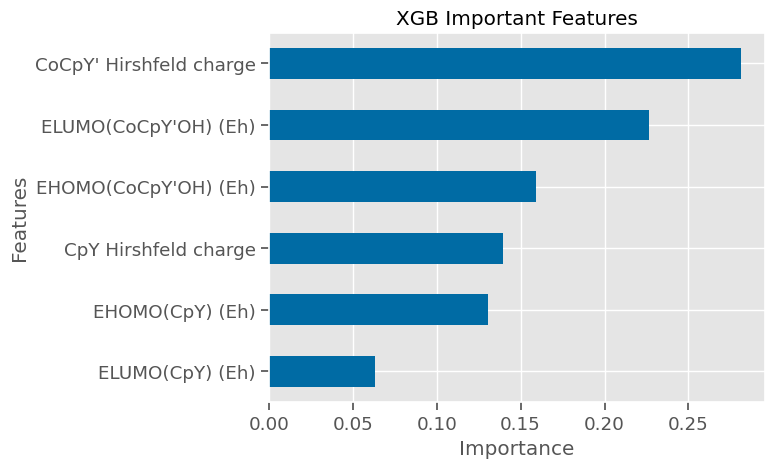

In [61]:
## plot importances 
ax= importances.sort_values(ascending=True).tail(8).plot(kind = 'barh')
ax.set(xlabel = 'Importance', ylabel = 'Features', 
       title='XGB Important Features')


In [62]:
#init shap
shap.initjs()

# taking a sample of training data
SEED = 321
X_shap = shap.sample(X_train_df, nsamples= 500, random_state=SEED)
X_shap

y_shap = y_train.loc[X_shap.index]
y_shap

# Creating a model explainer
explainer = shap.Explainer(xgb_fi)
explainer

# Calculating the shap values for the  model
shap_values = explainer(X_shap, y_shap)
shap_values[0]

shap_values.shape

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


(500, 6)

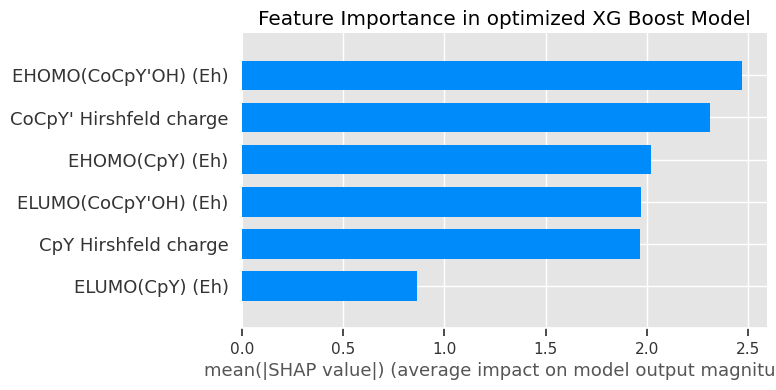

In [63]:
## create a summary plot (bar version)
ax= shap.summary_plot(shap_values, plot_type= 'bar', show= False)
plt.title('Feature Importance in optimized XG Boost Model')
plt.savefig('xgb_opt_fi.png')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


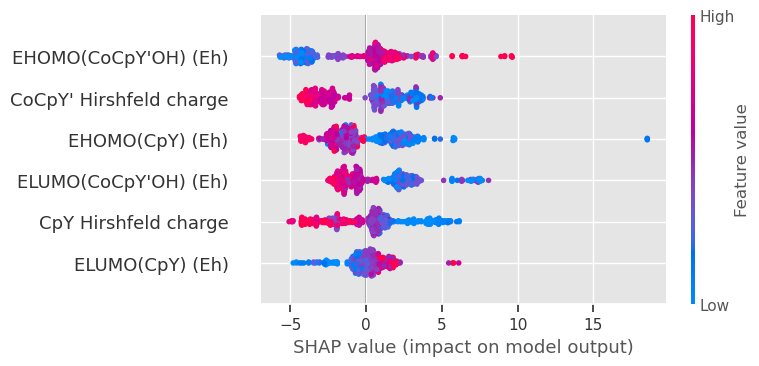

In [64]:
## create a summary plot (dot/default version)
shap.summary_plot(shap_values, show = False);
plt.savefig('xgb_opt_fi_shap.png')

In [65]:
predicted_y =  pd.DataFrame(index = y_test.index)
predicted_y['predicted_bde'] = xgb_opt.predict(X_test)
predicted_y

,predicted_bde
825,15.958207
320,16.958851
383,29.987045
764,14.655195
423,10.187039
...,...
211,24.911764
708,13.079524
81,18.397232
797,4.411481


In [66]:
new_test_data = pd.concat([X_test, predicted_y], axis = 1)
new_test_data

,EHOMO(CoCpY'OH) (Eh),ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,predicted_bde
825,-0.2078,-0.0797,-0.2036,-0.1237,-0.011530,-0.011530,15.958207
320,-0.2053,-0.0778,-0.2374,-0.1438,-0.024960,0.101747,16.958851
383,-0.2009,-0.0945,-0.2260,-0.1356,-0.033870,0.046900,29.987045
764,-0.2297,-0.0944,-0.1552,-0.0768,0.156189,-0.081960,14.655195
423,-0.2131,-0.0789,-0.2435,-0.1513,-0.050620,0.160449,10.187039
...,...,...,...,...,...,...,...
211,-0.2209,-0.0867,-0.1949,-0.1183,0.038080,-0.000780,24.911764
708,-0.2245,-0.0888,-0.1957,-0.1164,0.041561,-0.042140,13.079524
81,-0.2097,-0.0823,-0.1886,-0.1003,-0.040350,-0.015190,18.397232
797,-0.2350,-0.1068,-0.1660,-0.0954,0.160449,0.007790,4.411481


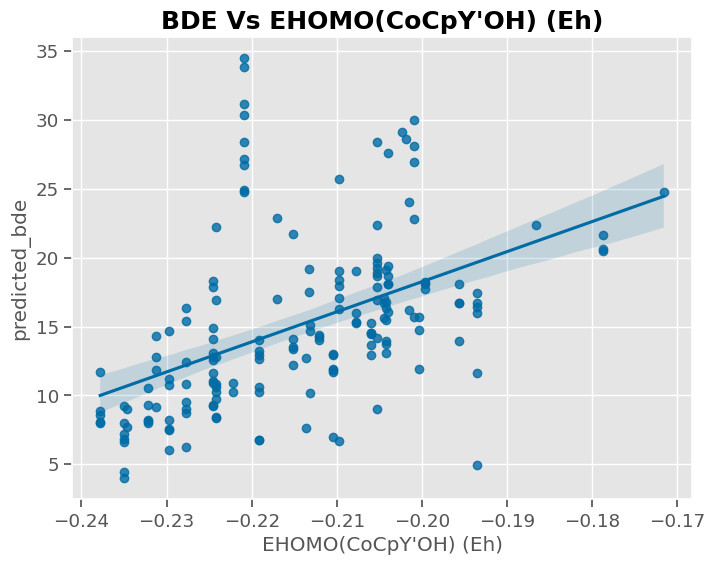

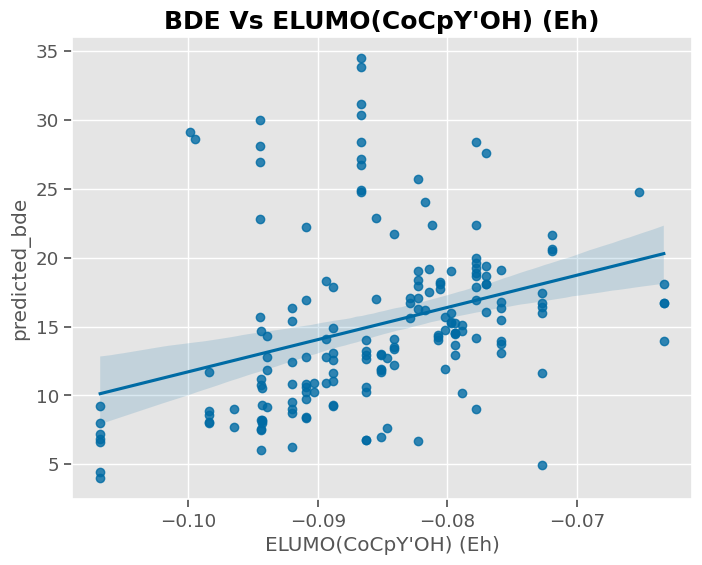

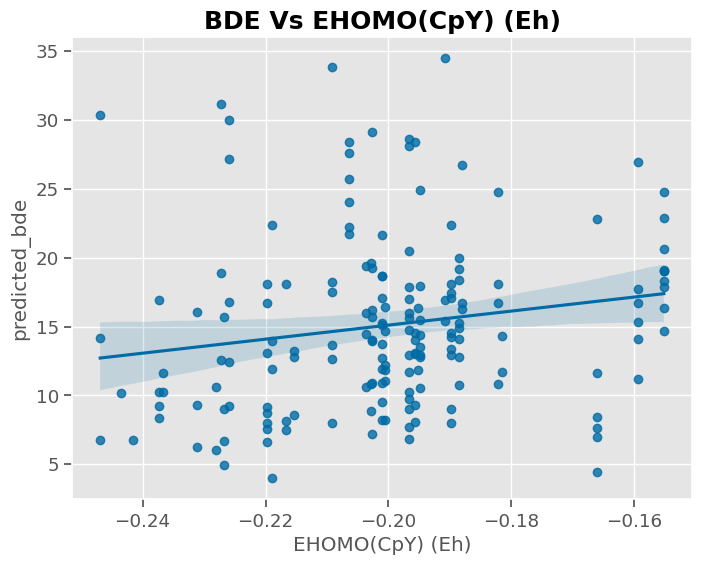

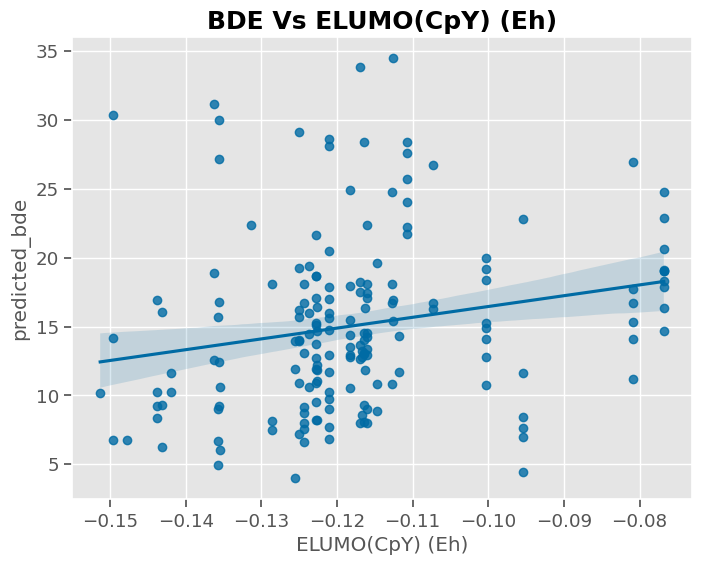

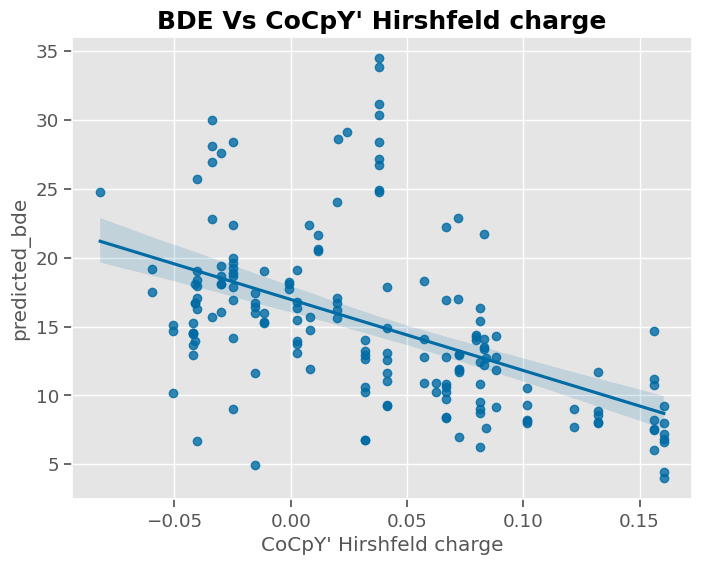

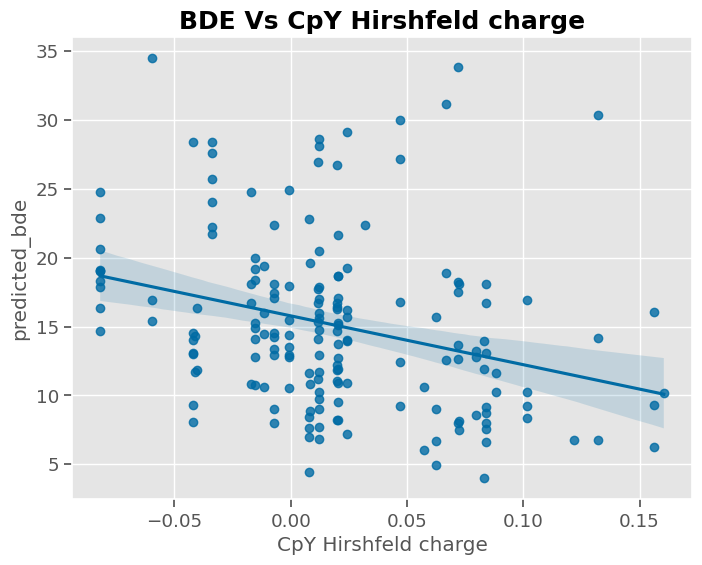

In [67]:
feat_cols = ["EHOMO(CoCpY'OH) (Eh)", "ELUMO(CoCpY'OH) (Eh)", 
              "EHOMO(CpY) (Eh)", "ELUMO(CpY) (Eh)", 
              "CoCpY' Hirshfeld charge", "CpY Hirshfeld charge"]
for i in feat_cols:
    plt.figure(figsize=(8,6))
    sns.regplot(data = new_test_data, x = i , y = 'predicted_bde')
    plt.title(f'BDE Vs {i}', fontsize = 18, fontweight = 'bold')
    plt.savefig(f'pred_bdevs{i}.png')

## For Random Forest

In [68]:
#parametrs of random forest model
rf_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestregressor', RandomForestRegressor(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestregressor': RandomForestRegressor(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 1.0,
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__oob_

In [69]:
#maximum max_depth value of estimators of rf 
est_depth = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depth)

24

In [70]:
rf_param_grid = {'randomforestregressor__n_estimators':[125]}

In [71]:
rf_pipe_gs = GridSearchCV(rf_pipe, rf_param_grid, cv =5)
rf_pipe_gs.fit(X_train, y_train);


In [72]:
print(f'Best parameters: {rf_pipe_gs.best_params_}')

Best parameters: {'randomforestregressor__n_estimators': 125}


In [73]:
rf_opt = rf_pipe_gs.best_estimator_
rf_opt.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=125, random_state=42))])

In [74]:
eval_model(rf_opt)

,Metrics,Train Score,Test Score
1,MAE,0.538323,1.571556
2,MSE,0.804829,7.363054
3,RMSE,0.897123,2.713495
4,R2,0.981905,0.822958


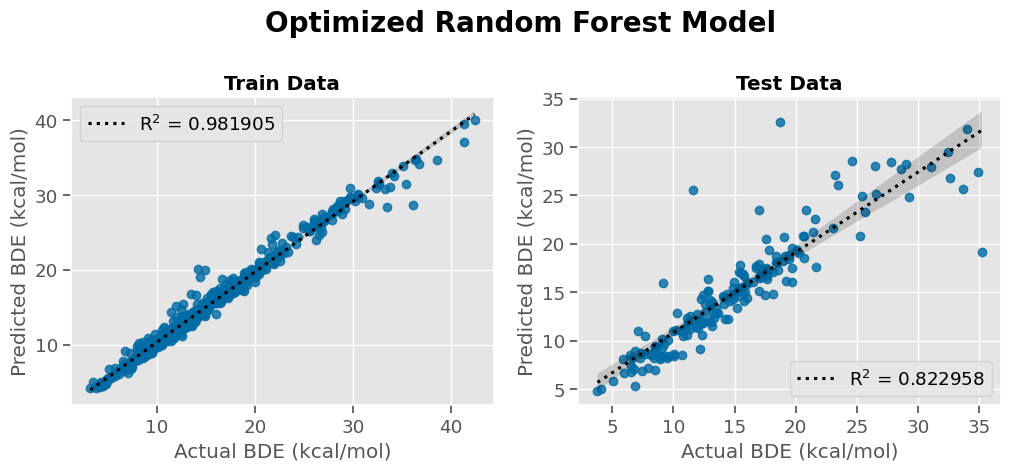

In [75]:
train_test_plot('Optimized Random Forest Model', rf_opt)
plt.savefig('rt_opt.png')

## For Bagged Tree

In [76]:
#parametrs of decision tree model
bt_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('baggingregressor', BaggingRegressor(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'baggingregressor': BaggingRegressor(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'baggingregressor__base_estimator': None,
 'baggingregressor__bootstrap': True,
 'baggingregressor__bootstrap_features': False,
 'baggingregressor__max_features': 1.0,
 'baggingregressor__max_samples': 1.0,
 'baggingregressor__n_estimators': 10,
 'baggingregressor__n_jobs': None,
 'baggingregressor__oob_score': False,
 'baggingregressor__random_state': 42,
 'baggingregressor__verbose': 0,
 'baggingregressor__warm_start': False}

In [77]:
bt_param_grid = {'baggingregressor__n_estimators':[125]}

In [78]:
bt_pipe_gs = GridSearchCV(bt_pipe, bt_param_grid, cv=5)
bt_pipe_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('baggingregressor',
                                        BaggingRegressor(random_state=42))]),
             param_grid={'baggingregressor__n_estimators': [125]})

In [79]:
print(f'Best parameters: {bt_pipe_gs.best_params_}')

Best parameters: {'baggingregressor__n_estimators': 125}


In [80]:
bt_opt = bt_pipe_gs.best_estimator_
bt_opt.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingregressor',
                 BaggingRegressor(n_estimators=125, random_state=42))])

In [81]:
eval_model(bt_opt)

,Metrics,Train Score,Test Score
1,MAE,0.538414,1.557368
2,MSE,0.798368,7.273639
3,RMSE,0.893514,2.696968
4,R2,0.98205,0.825108


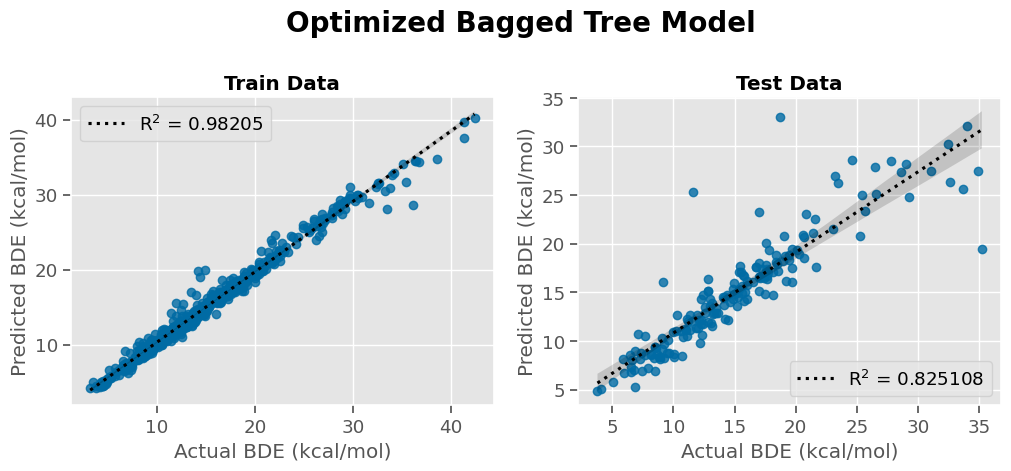

In [82]:
train_test_plot('Optimized Bagged Tree Model', bt_opt)
plt.savefig('bt_opt.png')

## Evaluvation of optimized models

In [83]:
model = ['XG Boost','Random Forest', 'Bagged Tree']
pipe = [xgb_opt, rf_opt, bt_opt]
final_eval_results = pd.DataFrame(columns = ['Model','Train R2', 'Test R2', 'Train RMSE (kcal/mol)', 'Test RMSE (kcal/mol)'])

for i in range(len(model)):
  final_eval_results.loc[i, 'Model'] = model[i]
  final_eval_results.loc[i,'Train R2'], final_eval_results.loc[i,'Test R2'], final_eval_results.loc[i,'Train RMSE (kcal/mol)'], final_eval_results.loc[i,'Test RMSE (kcal/mol)'] = eval_model_final(pipe[i])

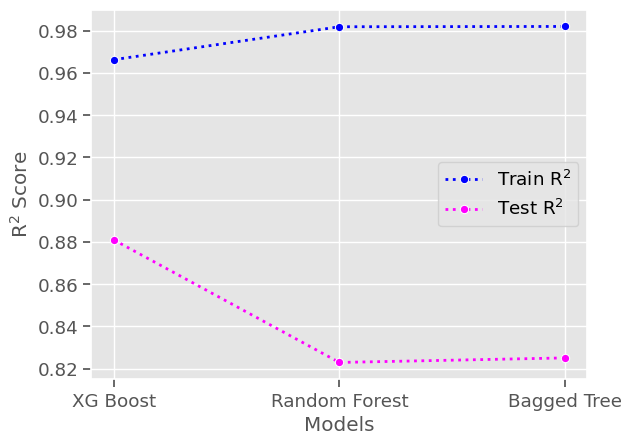

In [84]:
sns.lineplot(data = final_eval_results, x = 'Model', y= 'Train R2', 
             ls = ':', marker = 'o', label = 'Train R$^2$', lw = 2, color = 'blue' )
sns.lineplot(data = final_eval_results, x = 'Model', y= 'Test R2', 
             ls = ':', marker = 'o', label = 'Test R$^2$', lw = 2, color = 'magenta' )
plt.ylabel('R$^2$ Score')
plt.xlabel('Models')
#plt.title('Performance of optimized models ', fontsize = 18, fontweight = 'bold')
plt.savefig('r2_opt_models.png')

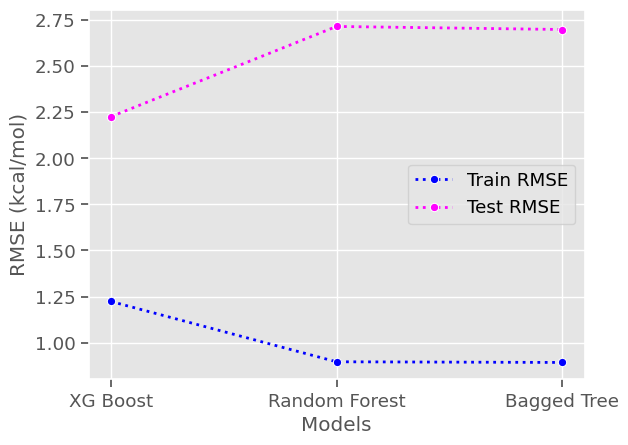

In [85]:
sns.lineplot(data = final_eval_results, x = 'Model', y= 'Train RMSE (kcal/mol)', 
             ls = ':', marker = 'o', label = 'Train RMSE', lw = 2, color = 'blue')
sns.lineplot(data = final_eval_results, x = 'Model', y= 'Test RMSE (kcal/mol)', 
             ls = ':', marker = 'o', label = 'Test RMSE', lw = 2, color = 'magenta')
plt.ylabel('RMSE (kcal/mol)')
plt.xlabel('Models')
#plt.title('Performance of optimized models ', fontsize = 18, fontweight = 'bold')
plt.savefig('rmse_opt_models.png')

In [86]:
final_eval_results.set_index('Model', inplace = True) 
final_eval_results

,Train R2,Test R2,Train RMSE (kcal/mol),Test RMSE (kcal/mol)
Model,,,,
XG Boost,0.966332,0.880944,1.223722,2.225191
Random Forest,0.981905,0.822958,0.897123,2.713495
Bagged Tree,0.98205,0.825108,0.893514,2.696968


Acording to the above scores for optimized models, XG Boost regression model is selected as the best ML model since it gained the highest R$^2$ score and lowest train and test RMSE scores.

# Identify Outliers

In [87]:
test_data =  pd.DataFrame(index = y_test.index)
test_data['Name'] = ml_df.loc[X_test.index, 'Name']
test_data["CoCpY' name"] = ml_df.loc[X_test.index, "CoCpY' name"]
test_data["CpY name"] = ml_df.loc[X_test.index, "CpY name"]
test_data['Actual BDE'] = y_test
test_data['XG Boost predicted BDE']= xgb_opt.predict(X_test)
test_data['xgb_error'] = abs(y_test - xgb_opt.predict(X_test))
test_data['Random Forest predicted BDE']= rf_opt.predict(X_test)
test_data['rf_error'] = abs(y_test - rf_opt.predict(X_test))
test_data['Bagged Tree predicted BDE']= bt_opt.predict(X_test)
test_data['bt_error'] = abs(y_test - bt_opt.predict(X_test))
test_data['avg_error'] = (test_data['xgb_error']+test_data['rf_error']+test_data['bt_error'])/3
test_data

,Name,CoCpY' name,CpY name,Actual BDE,XG Boost predicted BDE,xgb_error,Random Forest predicted BDE,rf_error,Bagged Tree predicted BDE,bt_error,avg_error
825,Co(Cp-o-PhCl)(Cp-o-PhCl)OH,o-PhCl,o-PhCl,17.641300,15.958207,1.683093,16.321697,1.319604,16.353873,1.287428,1.430042
320,Co(Cp-CH₃)(Cp-(CO)F)OH,CH₃,(CO)F,17.057187,16.958851,0.098336,16.648239,0.408948,16.638244,0.418943,0.308743
383,Co(Cp-C₃H₇)(Cp-(CO)CH₃)OH,C₃H₇,(CO)CH₃,31.062928,29.987045,1.075883,27.882727,3.180201,27.443741,3.619187,2.625090
764,Co(Cp-CN)(Cp-NC₅H₁₀)OH,CN,NC₅H₁₀,14.247297,14.655195,0.407899,14.414289,0.166992,14.535578,0.288281,0.287724
423,Co(Cp-H)(Cp-NO₂)OH,H,NO₂,10.225963,10.187039,0.038924,11.071731,0.845768,11.054210,0.828247,0.570980
...,...,...,...,...,...,...,...,...,...,...,...
211,Co(Cp-Ph)(Cp-(CO)NH₂)OH,(CO)NH₂,Ph,35.233200,24.911764,10.321436,19.131096,16.102105,19.429379,15.803822,14.075788
708,Co(Cp-CF₃)(Cp-op-Ph(CH₃)₃)OH,CF₃,op-Ph(CH₃)₃,12.815661,13.079524,0.263863,15.084398,2.268738,15.100463,2.284802,1.605801
81,Co(Cp-OCH₃)(Cp-P(Ph)₂)OH,P(Ph)₂,OCH₃,17.645418,18.397232,0.751814,17.300021,0.345397,17.419733,0.225685,0.440965
797,Co(Cp-NO₂)(Cp-N(Ph)₂)OH,NO₂,N(Ph)₂,4.063837,4.411481,0.347644,5.028831,0.964995,5.088533,1.024696,0.779112


In [88]:
top9_outliers = test_data[(test_data['xgb_error']>=3)&(test_data['rf_error']>=3)&(test_data['bt_error']>=3)]
top9_outliers

,Name,CoCpY' name,CpY name,Actual BDE,XG Boost predicted BDE,xgb_error,Random Forest predicted BDE,rf_error,Bagged Tree predicted BDE,bt_error,avg_error
136,Co(Cp-P(CH₃)₂)(Cp-(CO)NH₂)OH,(CO)NH₂,P(CH₃)₂,18.722000,34.477459,15.755459,32.540298,13.818298,33.018040,14.296040,14.623265
174,Co(Cp-S(CH₃))(Cp-(CO)NH₂)OH,(CO)NH₂,S(CH₃),32.606146,26.693390,5.912756,26.839615,5.766530,26.394475,6.211670,5.963652
572,Co(Cp-(CO)NH₂)(Cp-p-PhOCH₃)OH,(CO)NH₂,p-PhOCH₃,11.559246,24.748579,13.189333,25.597818,14.038572,25.281267,13.722021,13.649975
39,Co(Cp-N(CH₃)₂)(Cp-NC₅H₁₀)OH,N(CH₃)₂,NC₅H₁₀,25.291569,20.641768,4.649802,20.795148,4.496421,20.758613,4.532957,4.559727
888,Co(Cp-op-Ph(CH₃)₃)(Cp-op-Ph(CH₃)₃)OH,op-Ph(CH₃)₃,op-Ph(CH₃)₃,9.139162,14.511375,5.372214,15.951205,6.812044,16.026374,6.887212,6.357156
554,Co(Cp-(CO)NH₂)(Cp-(CO)CH₃)OH,(CO)NH₂,(CO)CH₃,34.914855,27.171240,7.743615,27.369791,7.545064,27.473783,7.441072,7.576584
816,Co(Cp-p-PhCl)(Cp-m-PhCF₃)OH,m-PhCF₃,p-PhCl,24.650748,28.617044,3.966297,28.572275,3.921528,28.579248,3.928501,3.938775
211,Co(Cp-Ph)(Cp-(CO)NH₂)OH,(CO)NH₂,Ph,35.233200,24.911764,10.321436,19.131096,16.102105,19.429379,15.803822,14.075788


In [89]:
top9_outliers = top9_outliers.sort_values(by = 'Actual BDE')
top9_outliers.to_excel('top9_outlier.xlsx')

In [93]:
top9_outliers['Name']

888    Co(Cp-op-Ph(CH₃)₃)(Cp-op-Ph(CH₃)₃)OH
572           Co(Cp-(CO)NH₂)(Cp-p-PhOCH₃)OH
136            Co(Cp-P(CH₃)₂)(Cp-(CO)NH₂)OH
816             Co(Cp-p-PhCl)(Cp-m-PhCF₃)OH
39              Co(Cp-N(CH₃)₂)(Cp-NC₅H₁₀)OH
174             Co(Cp-S(CH₃))(Cp-(CO)NH₂)OH
554            Co(Cp-(CO)NH₂)(Cp-(CO)CH₃)OH
211                 Co(Cp-Ph)(Cp-(CO)NH₂)OH
Name: Name, dtype: object

In [95]:
xlabels = ["[Co(Cp-op-Ph(CH₃)₃)(Cp-op-Ph(CH₃)₃)]OH"
,           "[Co(Cp-(CO)NH₂)(Cp-p-PhOCH₃)]OH"
,            "[Co(Cp-P(CH₃)₂)(Cp-(CO)NH₂)]OH"
,             "[Co(Cp-p-PhCl)(Cp-m-PhCF₃)]OH"
,              "[Co(Cp-N(CH₃)₂)(Cp-NC₅H₁₀)]OH"
,             "[Co(Cp-S(CH₃))(Cp-(CO)NH₂)]OH"
,            "[Co(Cp-(CO)NH₂)(Cp-(CO)CH₃)]OH"
,                 "[Co(Cp-Ph)(Cp-(CO)NH₂)]OH"]

In [102]:
top9_outliers["corrected name"]=xlabels
top9_outliers

,Name,CoCpY' name,CpY name,Actual BDE,XG Boost predicted BDE,xgb_error,Random Forest predicted BDE,rf_error,Bagged Tree predicted BDE,bt_error,avg_error,xlabels,corrected name
888,Co(Cp-op-Ph(CH₃)₃)(Cp-op-Ph(CH₃)₃)OH,op-Ph(CH₃)₃,op-Ph(CH₃)₃,9.139162,14.511375,5.372214,15.951205,6.812044,16.026374,6.887212,6.357156,[Co(Cp-op-Ph(CH₃)₃)(Cp-op-Ph(CH₃)₃)]OH,[Co(Cp-op-Ph(CH₃)₃)(Cp-op-Ph(CH₃)₃)]OH
572,Co(Cp-(CO)NH₂)(Cp-p-PhOCH₃)OH,(CO)NH₂,p-PhOCH₃,11.559246,24.748579,13.189333,25.597818,14.038572,25.281267,13.722021,13.649975,[Co(Cp-(CO)NH₂)(Cp-p-PhOCH₃)]OH,[Co(Cp-(CO)NH₂)(Cp-p-PhOCH₃)]OH
136,Co(Cp-P(CH₃)₂)(Cp-(CO)NH₂)OH,(CO)NH₂,P(CH₃)₂,18.722000,34.477459,15.755459,32.540298,13.818298,33.018040,14.296040,14.623265,[Co(Cp-P(CH₃)₂)(Cp-(CO)NH₂)]OH,[Co(Cp-P(CH₃)₂)(Cp-(CO)NH₂)]OH
816,Co(Cp-p-PhCl)(Cp-m-PhCF₃)OH,m-PhCF₃,p-PhCl,24.650748,28.617044,3.966297,28.572275,3.921528,28.579248,3.928501,3.938775,[Co(Cp-p-PhCl)(Cp-m-PhCF₃)]OH,[Co(Cp-p-PhCl)(Cp-m-PhCF₃)]OH
39,Co(Cp-N(CH₃)₂)(Cp-NC₅H₁₀)OH,N(CH₃)₂,NC₅H₁₀,25.291569,20.641768,4.649802,20.795148,4.496421,20.758613,4.532957,4.559727,[Co(Cp-N(CH₃)₂)(Cp-NC₅H₁₀)]OH,[Co(Cp-N(CH₃)₂)(Cp-NC₅H₁₀)]OH
174,Co(Cp-S(CH₃))(Cp-(CO)NH₂)OH,(CO)NH₂,S(CH₃),32.606146,26.693390,5.912756,26.839615,5.766530,26.394475,6.211670,5.963652,[Co(Cp-S(CH₃))(Cp-(CO)NH₂)]OH,[Co(Cp-S(CH₃))(Cp-(CO)NH₂)]OH
554,Co(Cp-(CO)NH₂)(Cp-(CO)CH₃)OH,(CO)NH₂,(CO)CH₃,34.914855,27.171240,7.743615,27.369791,7.545064,27.473783,7.441072,7.576584,[Co(Cp-(CO)NH₂)(Cp-(CO)CH₃)]OH,[Co(Cp-(CO)NH₂)(Cp-(CO)CH₃)]OH
211,Co(Cp-Ph)(Cp-(CO)NH₂)OH,(CO)NH₂,Ph,35.233200,24.911764,10.321436,19.131096,16.102105,19.429379,15.803822,14.075788,[Co(Cp-Ph)(Cp-(CO)NH₂)]OH,[Co(Cp-Ph)(Cp-(CO)NH₂)]OH


Above derivatives are the top 9 derivatives which made the largest error with actual BDE in all 3 best models. 
- |Actual BDE - Predicted BDE | >= 3 kcal/mol

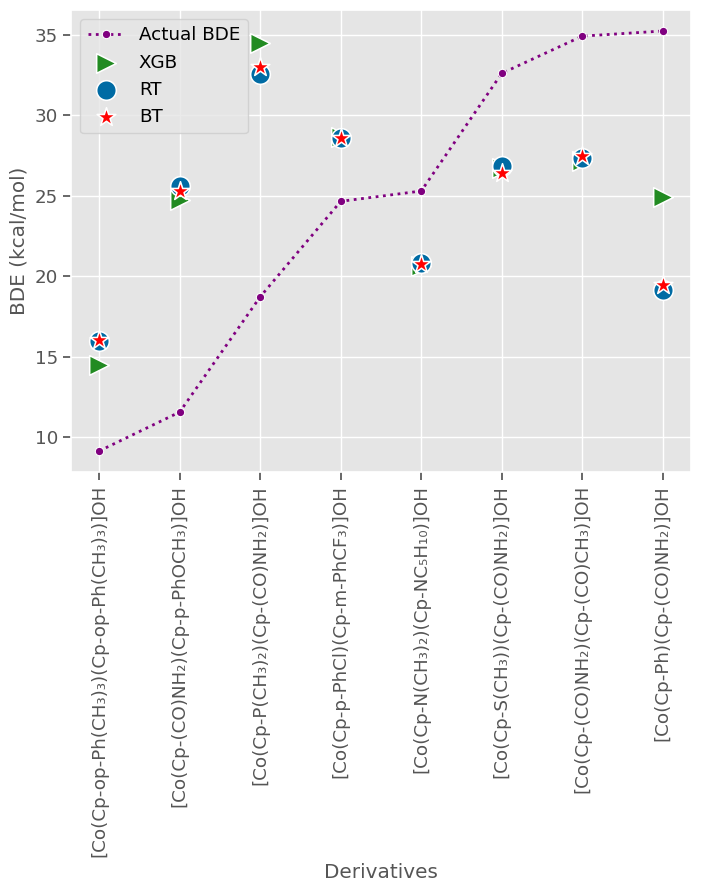

In [104]:
fig, ax =plt.subplots(figsize=(8,6))
sns.lineplot(data = top9_outliers, x = "corrected name", y = 'Actual BDE', 
             label= 'Actual BDE', marker= 'o', ls = ':', color = 'purple', lw = 2, ax = ax)
sns.scatterplot(data = top9_outliers, x = 'corrected name', y = 'XG Boost predicted BDE',
                label= 'XGB', marker = '>', s = 200, color = 'forestgreen')
sns.scatterplot(data = top9_outliers, x = 'corrected name', y = 'Random Forest predicted BDE',
                label= 'RT', s =200)
sns.scatterplot(data = top9_outliers, x = 'corrected name', y = 'Bagged Tree predicted BDE',
                label= 'BT', marker = '*', s =200, color = 'red')
plt.xticks(rotation =90)
plt.ylabel('BDE (kcal/mol)')
plt.xlabel('Derivatives')
#plt.title('Top 8 Outliers in optimized models', fontsize = 18, fontweight = 'bold')
plt.savefig('top9_outlier.png')